In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/yanndupis/Building-a-Student-Intervention-System/master/student-data.csv')

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,yes


In [ ]:
X=df.drop(['passed'],axis=1)

In [ ]:
y=df['passed']

In [ ]:
X_onehot=pd.get_dummies(X)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X_onehot, y)

In [ ]:
cols = fvalue_selector.get_support(indices=True)
X_df_new = X_onehot.iloc[:,cols]
X_df_new

,failures,goout
0,0,4
1,0,3
2,3,2
3,0,2
4,0,2
...,...,...
390,2,4
391,0,5
392,3,3
393,0,1


In [ ]:
from sklearn.decomposition import  PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_df_new)

In [ ]:
df_pca=pd.DataFrame(X_pca,columns=['vetor1','vetor2'])


In [ ]:
y_numeric=[1 if y=='yes' else 0 for y in y]

In [ ]:
df_pca['passou']=y_numeric
df_pca.head(5)

,vetor1,vetor2,passou
0,0.833064,-0.460226,0
1,-0.156304,-0.314792,0
2,-0.709370,2.798746,1
3,-1.145672,-0.169358,1
4,-1.145672,-0.169358,1


In [ ]:
df_pca['cor']=['red' if y==0 else 'blue' for y in df_pca.passou.values]

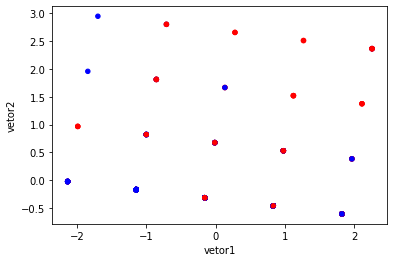

In [ ]:
df_pca.plot.scatter(x='vetor1',y='vetor2',c='cor')

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_pca,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.73      0.33      0.46        33
         yes       0.74      0.94      0.83        66

    accuracy                           0.74        99
   macro avg       0.74      0.64      0.64        99
weighted avg       0.74      0.74      0.70        99



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df_new,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.71      0.29      0.42        34
         yes       0.72      0.94      0.81        65

    accuracy                           0.72        99
   macro avg       0.72      0.62      0.61        99
weighted avg       0.72      0.72      0.68        99



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[10 24]
 [ 4 61]]


In [ ]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.75      0.35      0.48        34
         yes       0.73      0.94      0.82        65

    accuracy                           0.74        99
   macro avg       0.74      0.65      0.65        99
weighted avg       0.74      0.74      0.71        99



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[12 22]
 [ 4 61]]
